# One Class Support Vector Machines

## Importing Libraries

In [169]:
# Data Processing
import numpy as np
import pandas as pd
from collections import Counter

# Importing tde
import tde

import matplotlib.pyplot as plt

# Model and Performance
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report #for model performance evaluation
from sklearn.metrics import confusion_matrix

from scipy.stats import scoreatpercentile

# To generate the for loops
import glob
import os
from matplotlib import ticker

## Data Management

In [2]:
# READ INFECTION TIME DATA
infection_data = pd.read_excel('/Users/yoddmena/Downloads/Research/Telemetry_edited/MRSA - Master sheet.xlsx', index_col=0)

# READ AND EXTRACT DATA FROM FOLDER CONTAINING EXCEL SHEETS
folder = "/Users/yoddmena/Downloads/Research/Telemetry_edited/"
files = glob.glob( folder + "Ex *.xlsx" ) 

In [3]:
# CREATE A LIST OF TEMPERATURES
temp = []

for file in files:
    df = pd.read_excel(file)
    file_temp = df.iloc[:, 3::2]  # slicing the data for only temperature
    
    # Ensure that the number of minutes matches the number of temperature columns
    num_temp_columns = file_temp.shape[1]
    
    # Iterate over every other column in file_temp
    for j in range(0, num_temp_columns):
        # Extract the specific temperature column and its corresponding minutes
        column_name = file_temp.columns[j]
        temperature = file_temp[column_name]
        
        # Append the temperature and minutes to each lists
        temp.append(temperature)

## Creating Data Frames

In [4]:
##### INFECTION DATA
infection_data = infection_data.iloc[:,[1,9]]
infection_data = infection_data.T # transpose the data

infection_data.columns = infection_data.iloc[0] # Assign the values of the first row as the new column names

infection_data = infection_data[1:] # Remove the first row (previous column names)


##### TEMPERATURE DATA
df_temp = pd.DataFrame(temp)
df_temp = df_temp.T # transpose the data

df_temp.columns = df_temp.columns.astype(str).str.split(' ').str[0] # Rename columns keeping only the first word


## Scores

In [5]:
# IMPORTING THE SVM MODEL
# this model is from SckiKit Learn
model = svm.OneClassSVM()

# SIGMOID DEFINITION
# we will use the sigmoid function to make our scores be a numerical value that lies between 0 and 1

beta = (2/700) # 700 is the largest value
def sigmoid(scores, beta):
    return 1 / (1 + np.exp(-beta * scores))

Found 'CC006-315' and its infection value is '10300'
              precision    recall  f1-score   support

Nonanomalies       0.82      1.00      0.90      5980
   Anomalies       1.00      0.91      0.95     14324

    accuracy                           0.94     20304
   macro avg       0.91      0.95      0.93     20304
weighted avg       0.95      0.94      0.94     20304

Found 'CC006-316' and its infection value is '10300'
              precision    recall  f1-score   support

Nonanomalies       0.82      1.00      0.90      5980
   Anomalies       1.00      0.91      0.95     14324

    accuracy                           0.94     20304
   macro avg       0.91      0.95      0.93     20304
weighted avg       0.95      0.94      0.94     20304

Found 'CC006-317' and its infection value is '10300'
              precision    recall  f1-score   support

Nonanomalies       0.68      1.00      0.81      5980
   Anomalies       1.00      0.81      0.89     14324

    accuracy           

/Users/yoddmena/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yoddmena/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yoddmena/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

Nonanomalies       0.29      1.00      0.46      5980
   Anomalies       0.00      0.00      0.00     14324

    accuracy                           0.29     20304
   macro avg       0.15      0.50      0.23     20304
weighted avg       0.09      0.29      0.13     20304

Found 'CC043-456' and its infection value is '10300'
              precision    recall  f1-score   support

Nonanomalies       0.36      0.96      0.52      5980
   Anomalies       0.95      0.27      0.42     14324

    accuracy                           0.48     20304
   macro avg       0.65      0.62      0.47     20304
weighted avg       0.77      0.48      0.45     20304

Found 'CC043-457' and its infection value is '10300'


/Users/yoddmena/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yoddmena/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yoddmena/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

Nonanomalies       0.29      1.00      0.46      5980
   Anomalies       0.00      0.00      0.00     14324

    accuracy                           0.29     20304
   macro avg       0.15      0.50      0.23     20304
weighted avg       0.09      0.29      0.13     20304

Found 'CC051-489' and its infection value is '10300'
              precision    recall  f1-score   support

Nonanomalies       0.31      0.99      0.47      5980
   Anomalies       0.95      0.06      0.12     14324

    accuracy                           0.34     20304
   macro avg       0.63      0.53      0.29     20304
weighted avg       0.76      0.34      0.22     20304

Found 'CC051-490' and its infection value is '10300'
              precision    recall  f1-score   support

Nonanomalies       0.39      1.00      0.56      5980
   Anomalies       1.00      0.35      0.52     14324

    accuracy                           0.54     20304
   macro avg       0.6

'\n\nprint("Average Minimum Scores by Infection Time:", average_min_scores_by_infection_time)\n    \nfor infection_time, results in results_by_infection_time.items():\n    print(f"Results for infection time {infection_time}:")\n    print("Min Scores:", results[\'min_scores\'])\n    print("First Anomaly Train:", results[\'first_anom_train\'])\n    # ... print other results ...\n    print("====================================")\n    ##################################################################\n    \n '

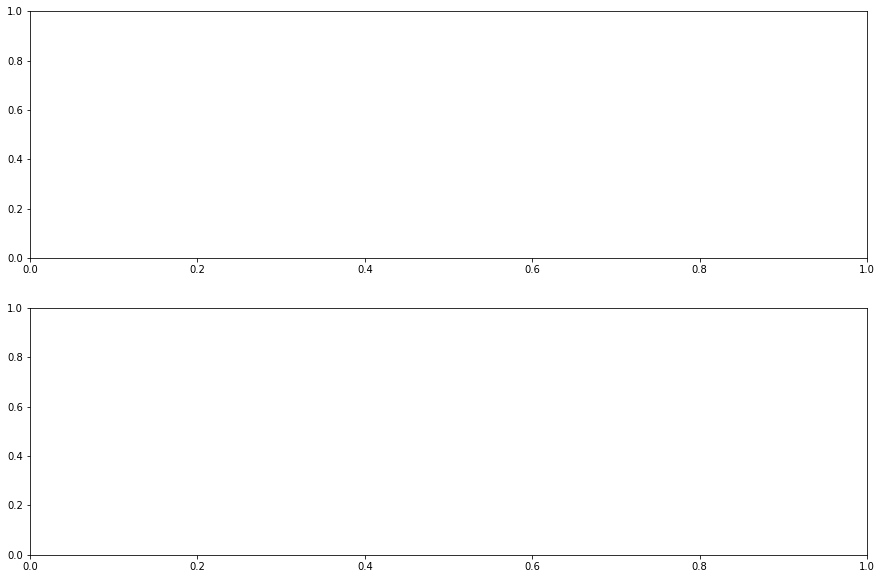

In [170]:
fig,ax = plt.subplots(2,1,figsize=(15,10), sharex = False)
fig.set_facecolor("white")
#classifier_tree = DecisionTreeClassifier()
train_end = 4320
shift = 2*360 # since the period is 6 hours (360) and we do this twice

# LISTS

# Create a dictionary to store results based on infection time
results_by_infection_time = {}

# First anomalies after infection
'''
min_scores = []
first_anom_train = []
first_anom_inf = []
score_train = []
score_infec = []
tpr = []
'''

for i in range(0, 10): #df_temp.shape[1]
    ax[0].cla()  # clear axis 0-1
    ax[1].cla()
    
    #mice_min = range(0, df_temp.shape[0]) # Get the specific minutes for the current temperature time series
    
    temp_value = df_temp.iloc[:, i] # extract the temperature values for the current column
    mice_temp = df_temp.iloc[:, i].to_frame() # converting temp list to data frame
    
    names = mice_temp.columns[0] # get the column name for the current file
    
    ##################################################################
    # Finding Infection Time
    matching_columns = set(mice_temp.columns).intersection(infection_data.columns)
    
    if matching_columns:
        column_name = matching_columns.pop()
        infection_time = infection_data.loc['Aprprox Infection Minute', column_name]
        print(f"Found '{column_name}' and its infection value is '{infection_time}'")
        ##################################################################
        # Filing in missing data
        temp_value_fw = temp_value.fillna(method='ffill') # foward fill
        temp_value_bw = temp_value_fw.fillna(method='bfill') # backward fill after forward fill

        # Time Delay Embedding
        temp_tde = tde.tde(temp_value_bw) # using the tde file
        temp_tde = temp_tde.T # transporting the data

        ##################################################################
        # Fit the Data on the first 3 days (3*24*60) 
        model.fit(temp_tde[:train_end+1,:])

        # Predict the Data
        predict_train_data = model.predict(temp_tde[:train_end+1,:]) # predict on training data
        predict_test_data = model.predict(temp_tde[train_end+1:,:]) # predicting on test data

        # Scores
        scores_train_data = model.score_samples(temp_tde[:train_end+1,:]) # scores on training data 
        scores_test_data = model.score_samples(temp_tde[train_end+1:,:]) # scores on test data

        threshold = model.offset_

        ##################################################################
        # Combine training and testing scores and predictions
        combined_scores= np.concatenate((scores_train_data, scores_test_data), axis=0)
        combined_predictions = np.concatenate((predict_train_data, predict_test_data), axis=0)

        time = np.arange(temp_tde.shape[0])+(shift) # 2 times the time delay shift

        # Minimum score
        min_score = scores_train_data.min()

        # Find the indices of the anomalies
        anomaly_indices = np.where(combined_scores <= min_score)[0] #finding the values where its -1 (anomaly)
        time_2 = anomaly_indices + (shift) # shifting the time for plotting
        
        ##################################################################
        # Find the index at which the first score is less than min_score
        boolean = combined_scores < min_score
        anom_train = np.argmax(boolean) # first anomaly after training period
        anom_infec = np.argmax(boolean[infection_time-shift:]) + infection_time # first anomaly after infection period

        
        # Set up for classification report
        dataset_len_train = len(combined_scores)+shift-train_end # finding the length of the testing dataset
        train_to_inf = combined_scores[train_end-shift : infection_time-shift]
        post_inf = combined_scores[infection_time-shift : ]
        true_neg = np.zeros(len(train_to_inf))
        true_pos = np.ones(len(post_inf))
        y_true = np.append(true_neg, true_pos, axis=0)  # Appends along row
        
        #y_true = np.ones(dataset_len_train) # creating an array of zeroes of that length
        ones_and_zeros_array = boolean.astype(int) # turning boolean outcomes into ones and zeros
        y_pred = ones_and_zeros_array[train_end-shift: ]
        target_names = ['Nonanomalies', 'Anomalies']
        print(classification_report(y_true, y_pred, target_names=target_names))
        cm = confusion_matrix(y_true, y_pred, labels = [0,1])
        
        
        # Get the corresponding value
        value = combined_scores[anom_train]
        value_1 = combined_scores[anom_infec-shift]

        # Calculating the time first anomaly was found after training and infection
        time_aft_train = (anom_train + shift) - train_end
        time_aft_infection = anom_infec - infection_time

        # Calculating the amount of false negatives (between end of train and infection time)
        #count_false_neg = np.count_nonzero(boolean[train_end:infection_time])
        count_false_neg = np.count_nonzero(ones_and_zeros_array[infection_time-shift : ] == 0)
        
        # Calculating the amount of true positives (infection time)
        #count_true_pos = np.count_nonzero(boolean[infection_time:]) 
        count_true_pos = np.count_nonzero(ones_and_zeros_array[infection_time-shift : ] == 1)
        
        # Calculating true positive rate
        # Check if the denominator is zero
        if (count_true_pos + count_false_neg) == 0:
            print("N/A")
            continue  # Skip this iteration and move to the next number
        
        TPR = count_true_pos / (count_true_pos + count_false_neg)
        
        if infection_time in results_by_infection_time:
            results_by_infection_time[infection_time]['min_scores'].append(min_score)
            results_by_infection_time[infection_time]['first_anom_train'].append(time_aft_train)
            results_by_infection_time[infection_time]['score_train'].append(value)
            results_by_infection_time[infection_time]['score_infec'].append(value_1)
            results_by_infection_time[infection_time]['tpr'].append(TPR)
            
        else:
            results_by_infection_time[infection_time] = {
                'min_scores': [min_score],
                'first_anom_train': [time_aft_train],
                'score_train': [value],
                'score_infec': [value_1],
                'tpr': [TPR],
                
            }
        
        ##################################################################
        '''
        # Plotting 2nd Graph
        ax[1].plot(time, combined_scores, '-', color='#6693F5', alpha=0.75)  # Plot the scores with blue color #[:100]
        ax[1].plot(time_2, combined_scores[anomaly_indices], '', color='purple') #coloring anomalies
        ax[1].grid()
        ax[1].set_ylabel("Score", fontsize=14)
        ax[1].set_xlabel("Minutes", fontsize=14)
        ax[1].set_title(f"Anomalies found using our threshold for '{names}'", fontsize=14)
        #ax[1].set_xlim(infection_time-5,infection_time+30)
        ax[1].set_xlim(-10,26000)
        ax[1].set_ylim(0,700)

        ##################################################################
        # Plotting Horizontal and Vertical Lines
        ax[1].axvline(x = anom_train+shift, color='blue', linestyle='--', label='First anomaly after training') # when the first value is less the minimum value
        ax[1].axvline(x = train_end, color='green', linestyle='-', label='End of training data')
        ax[1].axhline(y=min_score, color='red', linestyle='-', label='Threshold')
        ax[1].axvline(x = anom_infec, color='orange', linestyle ='-', label='First anomaly after infection')
        #ax[1].axhline(y=value, color='blue', linestyle='--', label='value')
        #ax[1].axhline(y=value_1, color='orange', linestyle='-', label='value_1')
        ax[1].legend()

        ##################################################################
        # Print Values
        print("Minimum Score: ", min_score)
        print("After Training Min: ", anom_train+shift)
        print("After Infection Min: ", anom_infec)
        print(f"First anomaly found after training: {time_aft_train} minutes with score {value}")
        print(f"First anomaly found after infection: {time_aft_infection} minutes with score {value_1}")
        print(f"True Positve Rate: {TPR*100}%")
        
        '''

        ##################################################################
        # Appending to Lists
        min_scores.append(min_score)
        first_anom_train.append(time_aft_train)
        first_anom_inf.append(time_aft_infection)
        score_train.append(value)
        score_infec.append(value_1)
        tpr.append(TPR)
    
    else:
        print(f"No match found for mouse '{names}'")
    
    print("====================================")
    

# Calculate statistics for each infection time
statistics_by_infection_time = {}

for infection_time, results in results_by_infection_time.items():
    min_scores = results['min_scores']
    first_anom_train = results['first_anom_train']
    #first_anom_inf = results['first_anom_inf']
    score_train = results['score_train']
    score_infec = results['score_infec']
    tpr = results['tpr']
    if 'first_anom_inf' in results:
        # Access the key and perform calculations
        first_anom_inf = results['first_anom_inf']
        # ... perform calculations ...
    else:
        print(f"Key 'first_anom_inf' not found for infection time {infection_time}")

    statistics = {
        'average_min_score': np.mean(min_scores),
        'std_min_score': np.std(min_scores),
        'q1_min_score': scoreatpercentile(min_scores, 25),
        'median_min_score': np.median(min_scores),
        'q3_min_score': scoreatpercentile(min_scores, 75),

        'average_first_anom_train': np.mean(first_anom_train),
        'std_first_anom_train': np.std(first_anom_train),
        'q1_first_anom_train': scoreatpercentile(first_anom_train, 25),
        'median_first_anom_train': np.median(first_anom_train),
        'q3_first_anom_train': scoreatpercentile(first_anom_train, 75),

        'average_first_anom_inf': np.mean(first_anom_inf),
        'std_first_anom_inf': np.std(first_anom_inf),
        'q1_first_anom_inf': scoreatpercentile(first_anom_inf, 25),
        'median_first_anom_inf': np.median(first_anom_inf),
        'q3_first_anom_inf': scoreatpercentile(first_anom_inf, 75),

        'average_score_train': np.mean(score_train),
        'std_score_train': np.std(score_train),
        'q1_score_train': scoreatpercentile(score_train, 25),
        'median_score_train': np.median(score_train),
        'q3_score_train': scoreatpercentile(score_train, 75),

        'average_score_infec': np.mean(score_infec),
        'std_score_infec': np.std(score_infec),
        'q1_score_infec': scoreatpercentile(score_infec, 25),
        'median_score_infec': np.median(score_infec),
        'q3_score_infec': scoreatpercentile(score_infec, 75),

        'average_tpr': np.mean(tpr),
        'std_tpr': np.std(tpr),
        'q1_tpr': scoreatpercentile(tpr, 25),
        'median_tpr': np.median(tpr),
        'q3_tpr': scoreatpercentile(tpr, 75)
    }

    statistics_by_infection_time[infection_time] = statistics

# Print statistics for each infection time
for infection_time, statistics in statistics_by_infection_time.items():
    print(f"Statistics for Infection Time {infection_time}:")
    print("Minimum Score:")
    print(f"Average: {statistics['average_min_score']}")
    print(f"Standard Deviation: {statistics['std_min_score']}")
    print(f"Quartiles: Q1={statistics['q1_min_score']}, Median={statistics['median_min_score']}, Q3={statistics['q3_min_score']}")
    
    
    
    
    
    
    
    
    
    
    
'''

print("Average Minimum Scores by Infection Time:", average_min_scores_by_infection_time)
    
for infection_time, results in results_by_infection_time.items():
    print(f"Results for infection time {infection_time}:")
    print("Min Scores:", results['min_scores'])
    print("First Anomaly Train:", results['first_anom_train'])
    # ... print other results ...
    print("====================================")
    ##################################################################
    
 '''   

In [163]:
min_scores

[267.52007264767286,
 274.82851288077353,
 293.83288135042164,
 212.29037014244363,
 109.43155702017589,
 220.4569600410759,
 201.27038915324266,
 238.9300181242933,
 215.330698492076,
 200.84077753916517,
 97.80512594093989,
 177.56524083948625,
 186.45145706278555,
 319.4026227352844,
 239.14555898873255,
 229.20471042009228,
 311.34595649359363,
 272.73784284600475,
 313.92807550387613]

In [140]:
20304- 14324

5980

In [139]:
len(true_neg)+len(true_pos)

20304

In [76]:
shift+len(boolean)-infection_time

14324

In [155]:
cm

array([[ 5980,     0],
       [ 1316, 13008]])

In [53]:
array=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
array1 = np.array([3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
do=4

In [58]:
array[4]

4

In [59]:
array1[4-do]

4

In [62]:
cm

<function confusion_matrix at 0x7fedc19cfa60>


In [120]:
# Example boolean array
boolean_array = np.array([True, False, True, False, True])

# Convert boolean array to ones and zeros
ones_and_zeros = boolean_array.astype(np.int)

print(ones_and_zeros)

[1 0 1 0 1]


<ipython-input-120-dd5f1c5e1983>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ones_and_zeros = boolean_array.astype(np.int)


In [112]:
bool_val

0

In [144]:
my_array = np.array([0, 1, 0, 0, 1, 0, 1, 1, 0])

# Count the number of zeros in the array
num_zeros = np.count_nonzero(my_array == 0)

print("Number of zeros:", num_zeros)

Number of zeros: 5
